In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('./Dataset/fer2013.csv')
print(dataset.shape)

(35887, 3)


In [3]:
#exploring dataset
print(dataset.iloc[0])

emotion                                                    0
pixels     70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
Usage                                               Training
Name: 0, dtype: object


In [4]:
#convert pandas dataframe to numpy array
data = dataset.values

print(data.shape)

(35887, 3)


In [5]:
num_images = data.shape[0]
#convert data into inout and output values
y = data[:,0]

#intialising x with shape of (input_images, (48 * 48))
#where 48 * 48 is the shape of each image
X = np.zeros((num_images, 48 * 48))

#initialize a temp variable with pixel values of each image
temp = data[:,1]

#filling x with pixel values of each image
for ix in range(num_images):
    t = temp[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix,iy] = int(t[iy])

print(X.shape)
print(y.shape)

(35887, 2304)
(35887,)


In [6]:
#Before Normalization
print(X[0, :10])

[70. 80. 82. 72. 58. 58. 60. 63. 54. 58.]


In [7]:
#Normalizing images pixel values
X -= np.mean(X, axis = 0)
X /= np.std(X, axis = 0)

print('X_Shape: ', X.shape)
print(X[0, :10])

X_Shape:  (35887, 2304)
[-0.60646962 -0.4562069  -0.4011047  -0.50456157 -0.67067463 -0.66569461
 -0.6410465  -0.60871772 -0.75621507 -0.73092633]


In [8]:
y = np_utils.to_categorical(y)
print(y.shape)

(35887, 7)


In [9]:
split = int(0.85 * num_images)

x_train = X[:split]
x_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [10]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)

print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (30503, 2304)
y_train shape (30503, 7)
x_test shape (5384, 2304)
y_test shape (5384, 7)


In [11]:
x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_test.shape[0], 48, 48, 1))

In [12]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), input_shape=(48, 48, 1), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 32)        9248      
__________

In [14]:
hist = model.fit(x_train, y_train,
                     epochs=10,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

Train on 30503 samples, validate on 5384 samples
Epoch 1/10
30503/30503 [==============================] - 241s 8ms/step - loss: 1.7804 - acc: 0.2719 - val_loss: 1.6147 - val_acc: 0.3826
Epoch 2/10
30503/30503 [==============================] - 171s 6ms/step - loss: 1.6046 - acc: 0.3753 - val_loss: 1.4679 - val_acc: 0.4476
Epoch 3/10
30503/30503 [==============================] - 160s 5ms/step - loss: 1.4774 - acc: 0.4344 - val_loss: 1.3783 - val_acc: 0.4773
Epoch 4/10
30503/30503 [==============================] - 150s 5ms/step - loss: 1.3841 - acc: 0.4706 - val_loss: 1.3037 - val_acc: 0.5067
Epoch 5/10
30503/30503 [==============================] - 159s 5ms/step - loss: 1.3333 - acc: 0.4920 - val_loss: 1.2491 - val_acc: 0.5186
Epoch 6/10
30503/30503 [==============================] - 170s 6ms/step - loss: 1.2796 - acc: 0.5091 - val_loss: 1.2103 - val_acc: 0.5299
Epoch 7/10
30503/30503 [==============================] - 184s 6ms/step - loss: 1.2434 - acc: 0.5279 - val_loss: 1.2044 - v

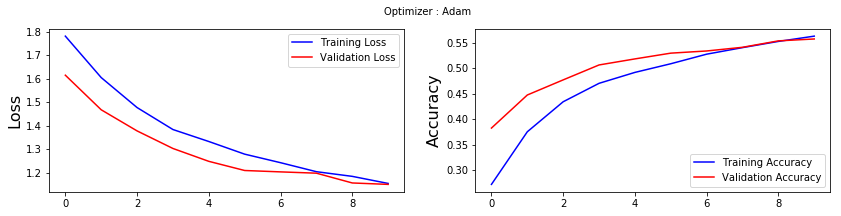

In [15]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [18]:
test = np.zeros((data.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = temp[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

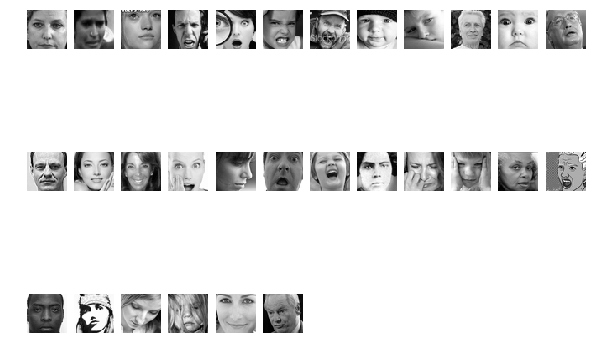

In [19]:
fig = plt.figure(figsize=(10,10))

for ix in range(30):
    ax = plt.subplot(4,12,ix+1)
    ax.set_title = ix
    plt.imshow(test[split+ix].reshape((48, 48)), cmap='gray')
    plt.axis('off')

In [20]:
pre = x_test[:100]
# print pre.shape
ans = model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        
print (correct)

NameError: name 'conv_model' is not defined